In [1]:
from src.data.mgf_tools.mgf_get import mgf_get_spectra
from src.utils import calculate_max_num_peaks
from src.utils import path_check



# Teste da função para obter o max_num_peaks

In [4]:
mgf_path = r"/Users/carla/PycharmProjects/Mestrado/Transformer-Based-Models-for-Chemical-Fingerprint-Prediction/datasets/raw/cleaned_gnps_library.mgf"

path_check(mgf_path)

In [4]:
mgf_data = mgf_get_spectra(mgf_path)

In [10]:
max_num_peaks = calculate_max_num_peaks(mgf_data, percentile=95)

In [11]:
print(max_num_peaks)

In [6]:
mz_vocabs = calculate_mz_vocabs(mgf_data)
print(mz_vocabs)

# Transformer Class test

In [1]:
from src.utils import path_check
from src.utils import calculate_mz_vocabs, calculate_max_num_peaks
from src.data.data_splitting import preprocess_and_split
from src.data.mgf_tools.mgf_get import mgf_get_spectra
from src.data.data_loader import data_loader 
from src.models.Transformer import Transformer

In [2]:
mgf_path = r"/Users/carla/PycharmProjects/Mestrado/Transformer-Based-Models-for-Chemical-Fingerprint-Prediction/datasets/raw/cleaned_gnps_library.mgf"

path_check(mgf_path)

In [3]:
mgf_spectra = mgf_get_spectra(mgf_path, num_spectra=100)

In [4]:
max_num_peaks = calculate_max_num_peaks(mgf_spectra, percentile=95)
mz_vocabs = calculate_mz_vocabs(mgf_spectra)
max_seq_len = max_num_peaks + 1
vocab_size = len(mz_vocabs)

In [7]:
print(max_num_peaks)
print(vocab_size)

In [6]:
splits = preprocess_and_split(mgf_path, seed=3, num_spectra=100)

In [8]:
loaders = data_loader(mgf_path=mgf_path, num_spectra=100, batch_size=4, seed=3, max_num_peaks=max_num_peaks, mz_vocabs=mz_vocabs)

In [10]:
model = Transformer(seed=3,max_seq_len=max_seq_len,vocab_size=vocab_size,morgan_default_dim=2048,d_model=128,n_head=4,num_layers=4,dropout_rate=0.1)

In [11]:
best_model = model.fit(train_loader=loaders["train"], val_loader=loaders["val"], max_epochs=10)

In [13]:
model.eval(test_loader=loaders["test"])

In [15]:
model.predict(loaders["test"], return_probabilities=False, save_results=False)

# Splits cleaning test

In [2]:
from src.config import mgf_path
from src.data.split_prep_tools.data_splitting import preprocess_and_split


In [3]:
final_splits = preprocess_and_split(mgf_path=mgf_path, seed=2, num_spectra=1000)



In [4]:
len(final_splits['test'])

# Ploting the losses

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

root = Path.home() / 'OneDrive' / 'Ambiente de Trabalho' / 'Tese' / 'Resultados' / 'Modelo_performance'

train2 = root / 'treino_12_vtcleaning_F_2' / 'train_loss.csv'
val2 = root / 'treino_12_vtcleaning_F_2' / 'val_loss.csv'

train=pd.read_csv(train2)
val=pd.read_csv(val2)

In [22]:
val.head()

,Wall time,Step,Value
0,1.763405e+09,1951,0.013149
1,1.763405e+09,3903,0.013113
2,1.763405e+09,5855,0.013145
3,1.763405e+09,7807,0.013129
4,1.763405e+09,9759,0.013147


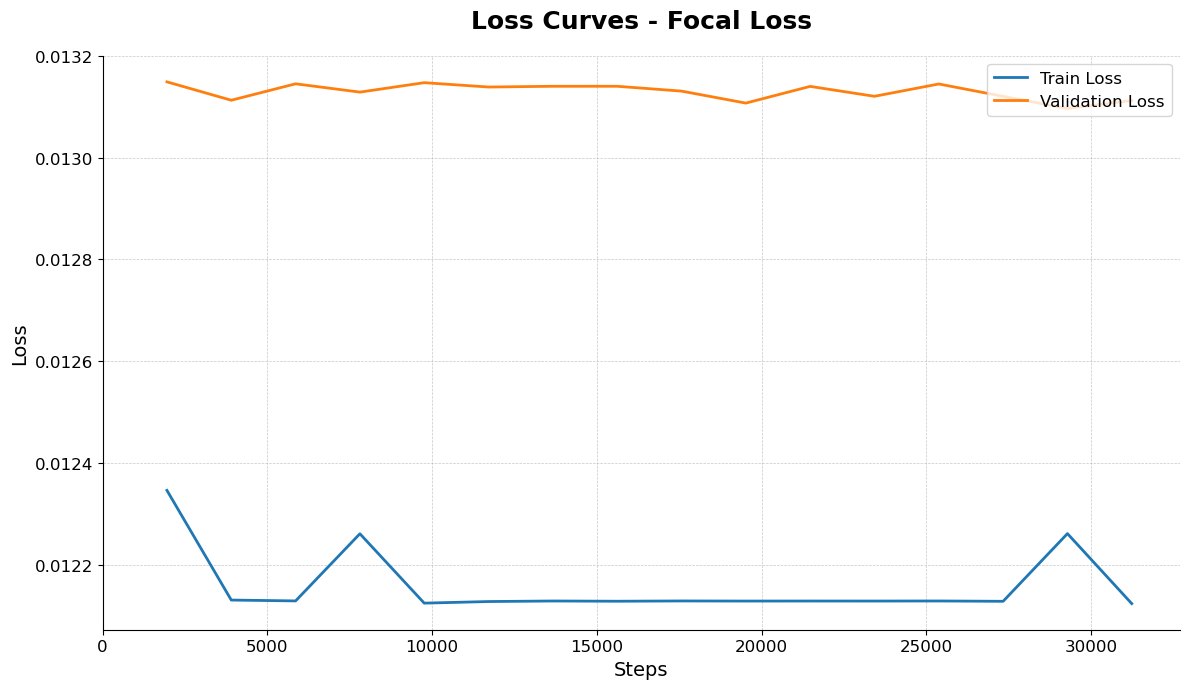

In [23]:
plt.figure(figsize=(12, 7))
plt.plot(train['Step'], train['Value'], label='Train Loss', color='#1f77b4', linewidth=2)
plt.plot(val['Step'], val['Value'], label='Validation Loss', color='#ff7f0e', linewidth=2)
plt.title('Loss Curves - Focal Loss', fontsize=18, weight='bold', pad=20)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(left=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

output_plot_path = root 
plt.savefig(output_plot_path, dpi=300)
plt.show()